## Setting

In [19]:
import pandas as pd

train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

train.shape, test.shape

((20000, 23), (10000, 22))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

f_path = 'C:\Windows\Fonts\malgun.ttf'
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
rc('font', family='Malgun Gothic')

## 문제
개인적 특성을 바탕으로 한 데이터를 활용하여 **소득 수준을 예측**하는 것을 목표로 한다.
다양한 개인적 특성 데이터를 분석하고 이해하는 능력을 키우며, 이를 통해 ai 역량과 경험을 발전시키는 것

<br>

개인의 특성과 관련된 다양한 데이터를 활용하여 개인 소득 수준을 예측할 수 있는 AI 모델 개발


### train dataset EDA

In [6]:
train.columns.symmetric_difference(test.columns)

Index(['Income'], dtype='object')

- 종속변수 'Income'

- isnull().sum() 결과 train, test 모두 NaN 값 없음

In [23]:
train.head()

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570


In [24]:
#하나씩 살펴보자
#(1) 수치형 

train.describe()

,Age,Working_Week (Yearly),Gains,Losses,Dividends,Income
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,35.632500,34.943050,383.129500,40.202150,123.451450,554.565250
std,17.994414,22.254592,4144.247487,279.182677,1206.949429,701.553155
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,34.000000,52.000000,0.000000,0.000000,0.000000,500.000000
75%,47.000000,52.000000,0.000000,0.000000,0.000000,875.000000
max,90.000000,52.000000,99999.000000,4356.000000,45000.000000,9999.000000


In [56]:
#EDA 함수

def eda_box(value): #박스플롯, 수치형
    plt.figure(figsize=(10,4))
    sns.boxplot(value, palette='Set1')
    plt.xticks(rotation=45)
    plt.show()

def eda_bar(value): #바 플롯, 범주형
    plt.figure(figsize=(10,4))
    sns.barplot(value, palette='Set1')
    plt.xticks(rotation=45)
    plt.show()   

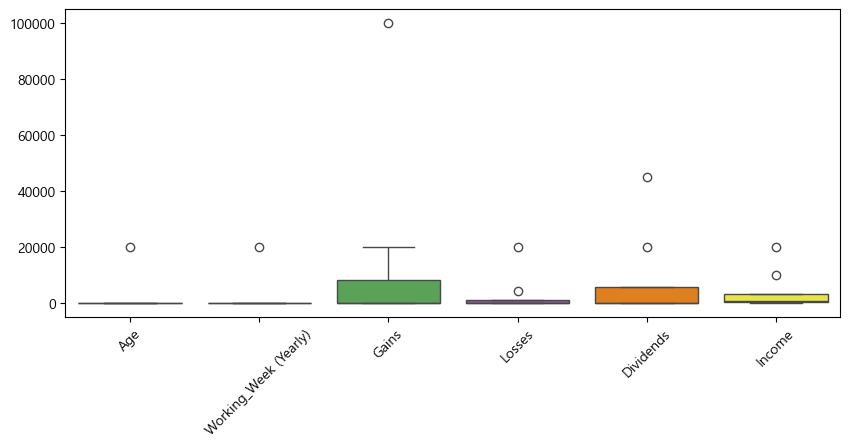

In [55]:
#수치형 describe
eda_box(train.describe())

수치형이 각각 이상치가 있는 상황으로 확인 후 전처리가 필요한 상황

C:\Users\sori4\AppData\Local\Temp\ipykernel_9720\1487583316.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(value, palette='Set1')


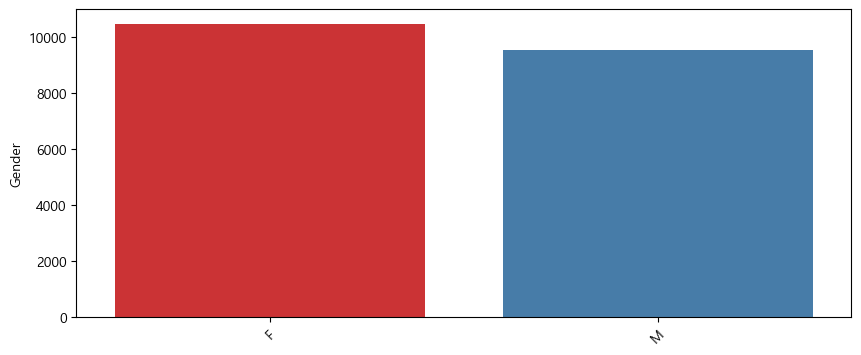

In [57]:
#(2) 성별
eda_bar(train['Gender'].value_counts())

In [36]:
# (3) Education_Status
train['Education_Status'].unique()

array(['Middle (7-8)', 'Associates degree (Vocational)', 'High graduate',
       'Masters degree', 'Bachelors degree', 'High Freshman',
       'Elementary (1-4)', 'College', 'Children', 'High Sophomore',
       'Associates degree (Academic)', 'High Junior', 'Elementary (5-6)',
       'Doctorate degree', 'Professional degree', 'High Senior',
       'Kindergarten'], dtype=object)

<Axes: ylabel='Education_Status'>

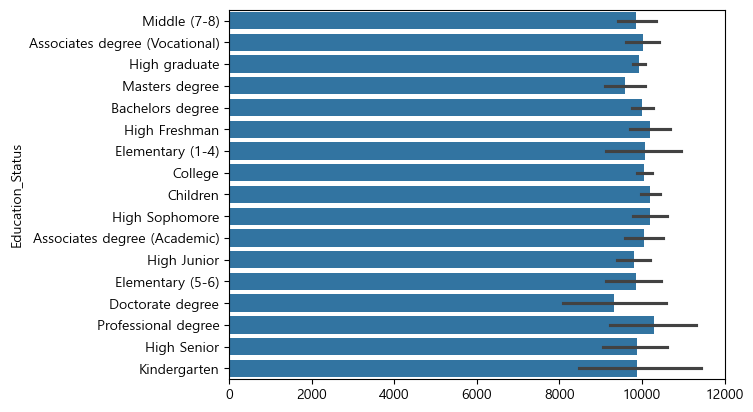

In [37]:
sns.barplot(train['Education_Status'])

분류가 다양해서 상위 분류로 묶어서 인코딩 진행

C:\Users\sori4\AppData\Local\Temp\ipykernel_9720\1487583316.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(value, palette='Set1')


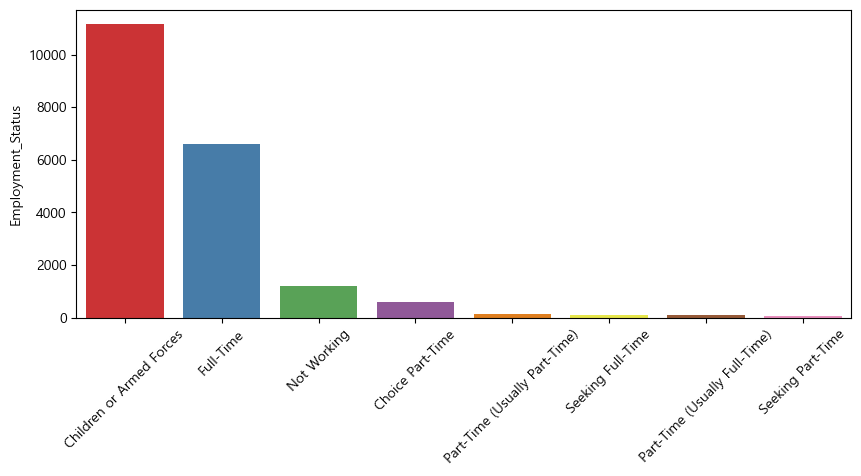

In [58]:
#(4) Employment_Status
eda_bar(train['Employment_Status'].value_counts())

상위 분류로 정리

<BarContainer object of 24 artists>

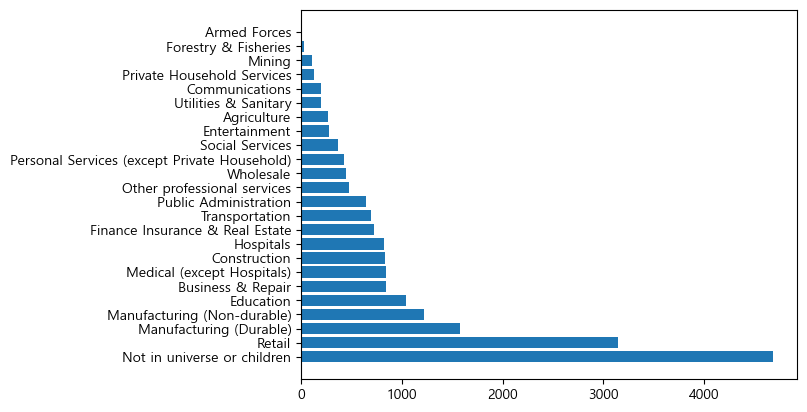

In [64]:
#(5) Industry_Status
industry_counts = train['Industry_Status'].value_counts()

# 수정된 코드
plt.barh(industry_counts.index, industry_counts.values)

In [67]:
#(6) Occupation_Status
train['Occupation_Status'].value_counts()

Unknown                             4688
Admin Support (include Clerical)    2709
Services                            2313
Craft & Repair                      1869
Sales                               1692
Professional                        1488
Machine Operators & Inspectors      1383
Management                          1111
Handlers/Cleaners                    837
Transportation                       690
Technicians & Support                558
Farming & Forestry & Fishing         296
Protective Services                  260
Private Household Services           105
Armed Forces                           1
Name: Occupation_Status, dtype: int64

직업상태에서 unknown이 다수를 차지해 이에 대한 전처리가 필요 <br>
다른 것들과 상관관계를 통해 주부를 unknown으로 하는지 파악이 필요

C:\Users\sori4\AppData\Local\Temp\ipykernel_9720\1487583316.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(value, palette='Set1')


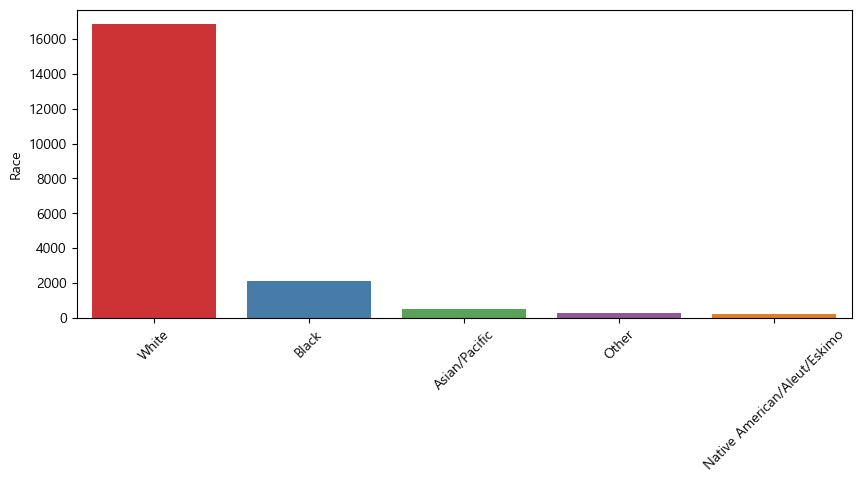

In [70]:
#(7) Race
eda_bar(train['Race'].value_counts())

In [71]:
#(8) Hispanic_Origin
train['Hispanic_Origin'].value_counts()

 All other                    17769
 Mexican-American               654
 Mexican (Mexicano)             624
 Central or South American      325
 Puerto Rican                   243
 Other Spanish                  201
 Cuban                           76
 NA                              59
 Chicano                         27
 Do not know                     22
Name: Hispanic_Origin, dtype: int64

hispanic_origin이 race와 상하위 관계로 예상되어 상관관계가 크지 않은지, 다중공선성은 없는지 파악이 필요

C:\Users\sori4\AppData\Local\Temp\ipykernel_9720\1487583316.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(value, palette='Set1')


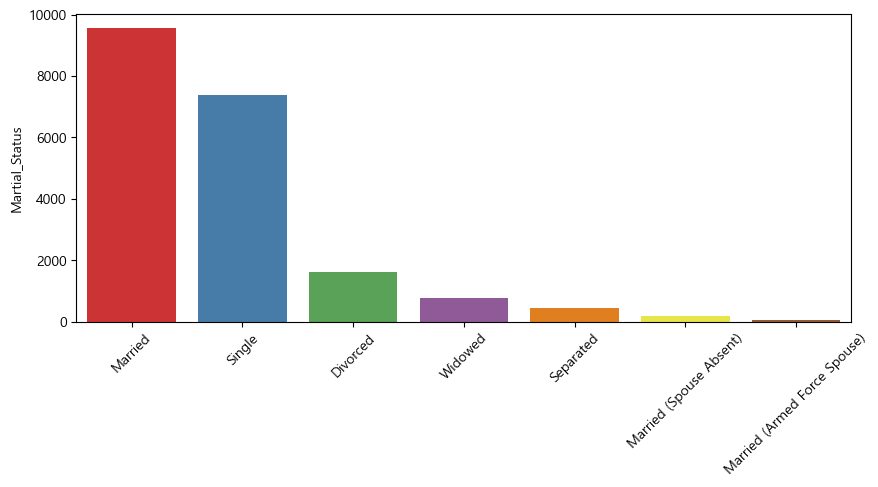

In [72]:
#(9) Martial_Status
eda_bar(train['Martial_Status'].value_counts())

Married를 하나로 합치는 전처리 필요

In [93]:
train['Household_Status'].value_counts()

Householder                                                               6087
Spouse of householder                                                     4794
Child <18 never marr not in subfamily                                     2670
Nonfamily householder                                                     2465
Child 18+ never marr Not in a subfamily                                   1860
Secondary individual                                                       845
Other Rel 18+ never marr not in subfamily                                  195
Other Rel 18+ ever marr not in subfamily                                   154
Child 18+ ever marr Not in a subfamily                                     118
Child 18+ ever married Responsible Person of subfamily                     101
Child 18+ never married Responsible Person of subfamily                     96
Grandchild <18 never married child of subfamily Responsible Person          88
Responsible Person of unrelated subfamily           

해당 카테고리 데이터 값 각각을 좀더 확인해야 함

In [102]:
train['Birth_Country'].unique()

array(['US', 'Cuba', 'Portugal', 'Mexico', 'Puerto-Rico', 'Germany',
       'Japan', 'Columbia', 'Philippines', 'Unknown', 'Italy',
       'Trinadad&Tobago', 'South Korea', 'Iran', 'England', 'India',
       'Vietnam', 'France', 'Scotland', 'Ecuador', 'China',
       'Outlying-U S (Guam USVI etc)', 'Nicaragua', 'Peru', 'Canada',
       'Jamaica', 'Dominican-Republic', 'Poland', 'Hong Kong', 'Thailand',
       'Cambodia', 'Guatemala', 'Laos', 'Yugoslavia', 'Haiti', 'Ireland',
       'El-Salvador', 'Panama', 'Honduras', 'Greece', 'Hungary', 'Taiwan',
       'Holand-Netherlands'], dtype=object)

In [104]:
print("Birth_Country 종류", train['Birth_Country'].nunique())
print("Birth_Country (Father) 종류", train['Birth_Country (Father)'].nunique())
print("Birth_Country (Mother) 종류", train['Birth_Country (Mother)'].nunique())

Birth_Country 종류 43
Birth_Country (Father) 종류 43
Birth_Country (Mother) 종류 43


태어난 국가가 43개로 US, Mid-South America, East Asia, Africa, Europe, South Asia 등으로 상위 분류 진행

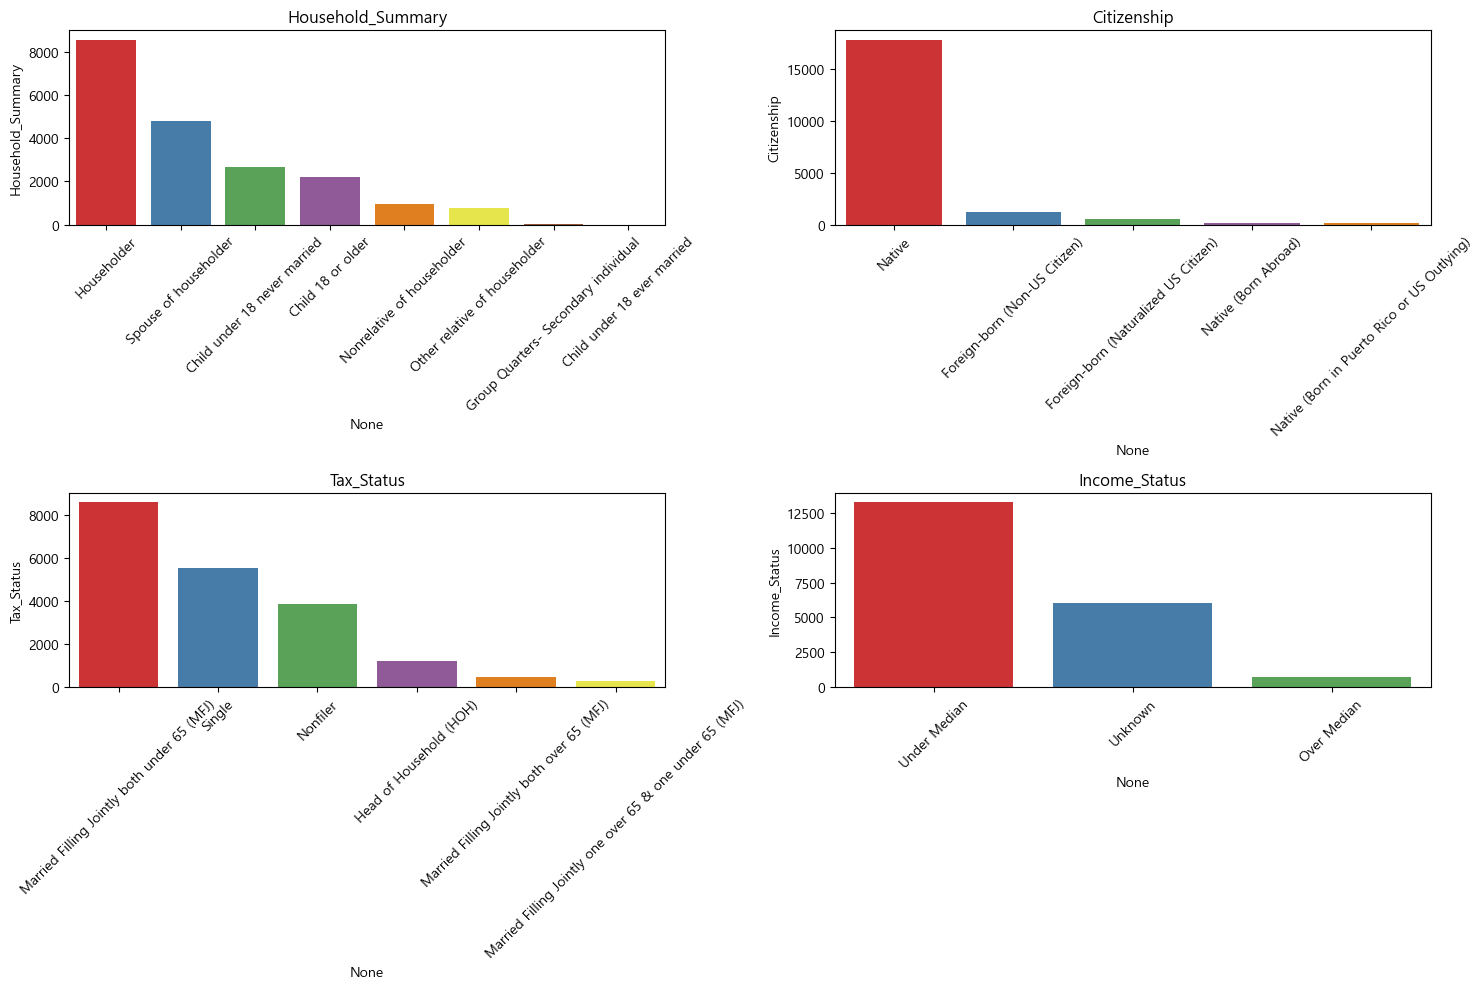

In [99]:
#(10) Industry_Status
f,ax = plt.subplots(2,2, figsize=(15,10))
lst = ['Household_Summary', 'Citizenship', 'Tax_Status', 'Income_Status']

for idx, feature in enumerate(lst):
    i = idx // 2  # subplot의 행 인덱스 계산 : 몫
    j = idx % 2   # subplot의 열 인덱스 계산 : 나머지
    sns.barplot(x=train[feature].value_counts().index, y=train[feature].value_counts(), hue=train[feature].value_counts().index, palette='Set1', ax=ax[i, j], legend=False)
    ax[i, j].tick_params(axis='x', rotation=45)
    ax[i, j].set_title(feature)  # subplot의 제목 설정

plt.tight_layout()  # subplot 간의 간격 조정
plt.show()

In [ ]:
train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,Household_Status,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,Married,Householder,Householder,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,Separated,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,Married,Householder,Householder,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,Divorced,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,Divorced,Householder,Householder,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,Single,Nonfamily householder,Householder,Native,US,US,US,Single,0,0,0,Under Median,1300
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,Single,Child 18+ never marr Not in a subfamily,Child 18 or older,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,Single,In group quarters,Group Quarters- Secondary individual,Native,US,US,US,Single,0,0,0,Unknown,999
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,Widowed,Nonfamily householder,Householder,Native,US,Scotland,England,Single,0,0,0,Under Median,0


### test dataset EDA

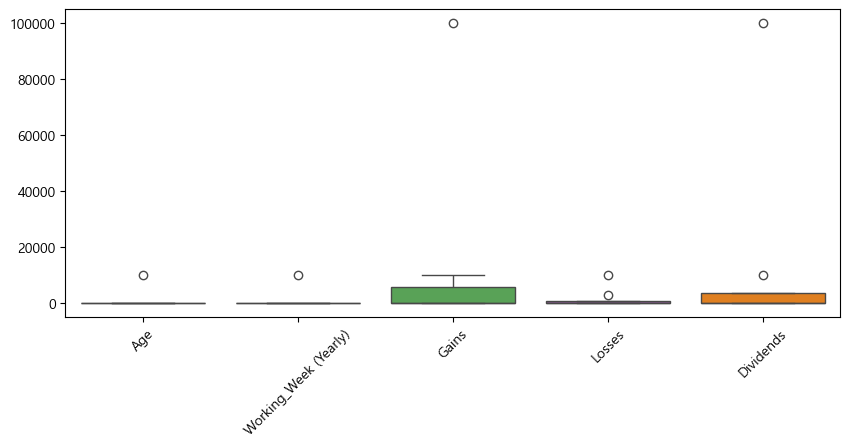

In [74]:
eda_box(test.describe())

### 전처리